In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [3]:
!pip install kmodes --quiet

In [4]:
from sklearn import preprocessing 
from sklearn.metrics import pairwise 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 
from sklearn.cluster import KMeans 
from pandas.plotting import parallel_coordinates
from kmodes.kmodes import KModes

In [8]:
ksi_df = pd.read_csv('KSI.csv')

In [10]:
pd.set_option('max_columns', None)

In [11]:
df = ksi_df.iloc[ksi_df['ACCNUM'].drop_duplicates().index]

In [ ]:
df['INVTYPE'].str.contains('Driver')

0         True
2         True
4         True
7         True
9         True
         ...  
16848    False
16850     True
16852     True
16854     True
16856     True
Name: INVTYPE, Length: 6002, dtype: bool

In [12]:
df = df[df['INVTYPE'].str.contains('Driver')]

In [13]:
def actc(x):
    if x in ('Speed Too Fast For Condition', 'Exceeding Speed Limit'):
        return 'Speeding'
    return x

def condc(x):
    if x in ('Ability Impaired, Alcohol', 'Ability Impaired, Alcohol Over .08', 'Had Been Drinking', 'Ability Impaired, Drugs', 'Ability Impaired, Alcohol Over .80'):
        return 'Ability Impaired (Drugs/Alcohol)'
    return x

def tc(x):
    if x in ('Traffic Controller', 'Police Control'):
        return 'Controller present'
    if x in ('Stop Sign', 'Yield Sign'):
        return 'Stop/Yield Sign'
    return x

In [14]:
df['TRAFFCTL'] = df['TRAFFCTL'].apply(tc)

In [15]:
df['DRIVACT'] = df['DRIVACT'].apply(actc)
df['DRIVCOND'] = df['DRIVCOND'].apply(condc)

In [16]:
# variables clustering on

cols = ['MANOEUVER', 'DRIVACT', 'DRIVCOND', 'TRAFFCTL', 'SPEEDING', 'ALCOHOL', 'REDLIGHT', 'AG_DRIV']
cols1 = ['ACCNUM','MANOEUVER', 'DRIVACT', 'DRIVCOND', 'TRAFFCTL', 'SPEEDING', 'ALCOHOL', 'REDLIGHT', 'AG_DRIV']

In [17]:
cluster_cols = df[cols]
cluster_cols1 = df[cols1]

In [18]:
#WITHOUT ACCNUM
kmode = KModes(n_clusters= 10, init = "random", n_init = 5, verbose=0, random_state = 1)
clusters = kmode.fit_predict(cluster_cols)

In [19]:
#WITH ACCNUM
clusters1 = kmode.fit_predict(cluster_cols1)

In [20]:
cluster_cols.insert(0, "Cluster", clusters, True)
cluster_cols1.insert(0, "Cluster", clusters, True)

In [21]:
#Number of accidents in each cluster
k = range(0,10)
for x in k:
  cluster_cols[cluster_cols['Cluster'] == x]
  print(cluster_cols[cluster_cols['Cluster'] == x].shape)

(750, 9)
(275, 9)
(1227, 9)
(559, 9)
(331, 9)
(235, 9)
(216, 9)
(117, 9)
(87, 9)
(269, 9)


In [111]:
cluster_cols[cluster_cols['Cluster'] == 0].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,0,Going Ahead,Driving Properly,Normal,Traffic Signal,<Null>,<Null>,<Null>,<Null>


In [113]:
cluster_cols1[cluster_cols1['Cluster'] == 0]

,Cluster,ACCNUM,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
9,0,893251,Going Ahead,Driving Properly,Normal,Traffic Signal,<Null>,<Null>,<Null>,<Null>
43,0,893964,Going Ahead,Driving Properly,Normal,Traffic Signal,<Null>,<Null>,<Null>,<Null>
76,0,899747,Going Ahead,Driving Properly,Normal,Traffic Signal,<Null>,<Null>,<Null>,<Null>
80,0,896072,Turning Right,Other,Normal,Stop/Yield Sign,<Null>,<Null>,<Null>,<Null>
82,0,899910,Stopped,Driving Properly,Normal,Traffic Signal,<Null>,<Null>,<Null>,<Null>
...,...,...,...,...,...,...,...,...,...,...
16710,0,2201920,Turning Left,Driving Properly,Unknown,Stop/Yield Sign,<Null>,<Null>,<Null>,<Null>
16721,0,2234722,Turning Left,Driving Properly,Normal,Stop/Yield Sign,<Null>,<Null>,<Null>,<Null>
16723,0,2253261,Going Ahead,Driving Properly,Normal,Traffic Signal,Yes,<Null>,<Null>,Yes
16775,0,2450003,Going Ahead,Other,Unknown,Traffic Signal,<Null>,<Null>,<Null>,<Null>


In [117]:
cluster_cols1[cluster_cols1['Cluster'] == 0].groupby('DRIVACT')['ACCNUM'].count()

DRIVACT
<Null>                   17
Driving Properly        529
Following too Close      25
Improper Lane Change      5
Improper Passing          3
Improper Turn            17
Lost control             91
Other                    62
Speed too Slow            1
Name: ACCNUM, dtype: int64

In [118]:
#to cross validate
validate = pd.read_csv('KSI.csv')

In [119]:
combined_0 = pd.merge(cluster_0, validate, on = ['ACCNUM'], how = 'left')
combined_0

,Cluster,ACCNUM,MANOEUVER_x,DRIVACT_x,DRIVCOND_x,TRAFFCTL_x,SPEEDING_x,ALCOHOL_x,REDLIGHT_x,AG_DRIV_x,X,Y,INDEX_,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL_y,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER_y,DRIVACT_y,DRIVCOND_y,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING_y,AG_DRIV_y,REDLIGHT_y,ALCOHOL_y,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,0,893251,Going Ahead,Driving Properly,Normal,Traffic Signal,<Null>,<Null>,<Null>,<Null>,-8.855097e+06,5.418678e+06,3389258,2006,2006/03/15 05:00:00+00,1535,15,ISLINGTON AVE,DIXON RD,<Null>,Major Arterial,Etobicoke York,"1,2",23,43.697045,-79.546690,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Driver,40 to 44,None,<Null>,East,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,D23,6,Kingsview Village-The Westway (6),10
1,0,893251,Going Ahead,Driving Properly,Normal,Traffic Signal,<Null>,<Null>,<Null>,<Null>,-8.855097e+06,5.418678e+06,3389259,2006,2006/03/15 05:00:00+00,1535,15,ISLINGTON AVE,DIXON RD,<Null>,Major Arterial,Etobicoke York,"1,2",23,43.697045,-79.546690,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Pedestrian,20 to 24,Fatal,<Null>,North,Other,<Null>,<Null>,<Null>,Vehicle is going straight thru inter.while ped...,Crossing without right of way,Normal,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,D23,6,Kingsview Village-The Westway (6),11
2,0,893964,Going Ahead,Driving Properly,Normal,Traffic Signal,<Null>,<Null>,<Null>,<Null>,-8.820043e+06,5.432052e+06,3391145,2006,2006/03/20 05:00:00+00,755,7,941 PROGRESS AVE,<Null>,<Null>,Minor Arterial,Scarborough,24,43,43.783845,-79.231790,Mid-Block,<Null>,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,Driver,20 to 24,None,<Null>,East,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,D43,137,Woburn (137),44
3,0,893964,Going Ahead,Driving Properly,Normal,Traffic Signal,<Null>,<Null>,<Null>,<Null>,-8.820043e+06,5.432052e+06,3391146,2006,2006/03/20 05:00:00+00,755,7,941 PROGRESS AVE,<Null>,<Null>,Minor Arterial,Scarborough,24,43,43.783845,-79.231790,Mid-Block,<Null>,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,Pedestrian,60 to 64,Major,<Null>,<Null>,Other,<Null>,<Null>,<Null>,Other / Undefined,Running onto Roadway,Normal,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,D43,137,Woburn (137),45
4,0,899747,Going Ahead,Driving Properly,Normal,Traffic Signal,<Null>,<Null>,<Null>,<Null>,-8.844611e+06,5.412414e+06,3406507,2006,2006/04/03 04:00:00+00,1615,16,DUNDAS ST W,BLOOR ST W,<Null>,Major Arterial,Toronto and East York,4,11,43.656345,-79.452490,Intersection,At Intersection,Traffic Signal,Rain,Daylight,Wet,Non-Fatal Injury,Pedestrian Collisions,Driver,50 to 54,None,<Null>,North,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,D11,88,High Park North (88),77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,0,2253261,Going Ahead,Driving Properly,Normal,Traffic Signal,Yes,<Null>,<Null>,Yes,-8.817054e+06,5.431849e+06,8

In [124]:
combined_0.groupby('DRIVACT_x')['ACCNUM'].nunique()

DRIVACT_x
<Null>                   17
Driving Properly        529
Following too Close      25
Improper Lane Change      5
Improper Passing          3
Improper Turn            17
Lost control             91
Other                    62
Speed too Slow            1
Name: ACCNUM, dtype: int64

In [187]:
cluster_cols[cluster_cols['Cluster'] == 2].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,2,Going Ahead,Driving Properly,Normal,No Control,<Null>,<Null>,<Null>,<Null>


In [196]:
cluster_cols[cluster_cols['Cluster'] == 7].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,7,Going Ahead,Speeding,Unknown,No Control,Yes,<Null>,<Null>,Yes


In [179]:
cluster_2 = cluster_cols1[cluster_cols1['Cluster'] == 2]

In [189]:
combined_2 = pd.merge(cluster_2, validate, on = ['ACCNUM'], how = 'left')
combined_2

,Cluster,ACCNUM,MANOEUVER_x,DRIVACT_x,DRIVCOND_x,TRAFFCTL_x,SPEEDING_x,ALCOHOL_x,REDLIGHT_x,AG_DRIV_x,X,Y,INDEX_,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL_y,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER_y,DRIVACT_y,DRIVCOND_y,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING_y,AG_DRIV_y,REDLIGHT_y,ALCOHOL_y,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,2,892682,Going Ahead,Other,Ability Impaired (Drugs/Alcohol),No Control,<Null>,Yes,<Null>,<Null>,-8.822759e+06,5.424516e+06,3387793,2006,2006/03/12 05:00:00+00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,<Null>,Major Arterial,Scarborough,"21,20",41,43.734945,-79.256190,Mid-Block,<Null>,No Control,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Driver,25 to 29,None,<Null>,West,"Automobile, Station Wagon",Going Ahead,Other,"Ability Impaired, Alcohol",<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5
1,2,892682,Going Ahead,Other,Ability Impaired (Drugs/Alcohol),No Control,<Null>,Yes,<Null>,<Null>,-8.822759e+06,5.424516e+06,3387794,2006,2006/03/12 05:00:00+00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,<Null>,Major Arterial,Scarborough,"21,20",41,43.734945,-79.256190,Mid-Block,<Null>,No Control,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Pedestrian,30 to 34,Minor,<Null>,South,Other,<Null>,<Null>,<Null>,Pedestrian hit at mid-block,"Crossing, no Traffic Control",Normal,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),6
2,2,892682,Going Ahead,Other,Ability Impaired (Drugs/Alcohol),No Control,<Null>,Yes,<Null>,<Null>,-8.822759e+06,5.424516e+06,3387795,2006,2006/03/12 05:00:00+00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,<Null>,Major Arterial,Scarborough,"21,20",41,43.734945,-79.256190,Mid-Block,<Null>,No Control,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Pedestrian,40 to 44,Fatal,<Null>,South,Other,<Null>,<Null>,<Null>,Pedestrian hit at mid-block,"Crossing, no Traffic Control",Normal,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),7
3,2,897348,Going Ahead,Driving Properly,Normal,No Control,<Null>,<Null>,<Null>,<Null>,-8.840024e+06,5.413768e+06,3400137,2006,2006/03/17 05:00:00+00,1554,15,BLOOR ST W,BATHURST ST,<Null>,Major Arterial,Toronto and East York,11,14,43.665145,-79.411290,Intersection,At Intersection,No Control,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,Driver,40 to 44,None,<Null>,West,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,D14,95,Annex (95),25
4,2,897348,Going Ahead,Driving Properly,Normal,No Control,<Null>,<Null>,<Null>,<Null>,-8.840024e+06,5.413768e+06,3400138,2006,2006/03/17 05:00:00+00,1554,15,BLOOR ST W,BATHURST ST,<Null>,Major Arterial,Toronto and East York,11,14,43.665145,-79.411290,Intersection,At Intersection,No Control,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,Pedestrian,20 to 24,Major,<Null>,North,Other,<Null>,<Null>,<Null>,Vehicle is going straight thru inter.while ped...,Running onto Roadway,Inattentive,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,D14,95,Annex (95),26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,2,1548237,Going Ahead,Lost control,Unknown,No Control,<Null>,<Null>,<Null>,<Null>,-8.820469e+06,5.437096e+06,8150802

In [190]:
combined_2.groupby([ 'DRIVACT_x'])['ACCNUM'].nunique()

DRIVACT_x
<Null>                        26
Driving Properly             701
Improper Lane Change          37
Improper Turn                 43
Lost control                 227
Other                        188
Speed too Slow                 2
Wrong Way on One Way Road      3
Name: ACCNUM, dtype: int64

In [191]:
combined_2.groupby('LOCCOORD')['ACCNUM'].nunique().sort_values(ascending = False)

LOCCOORD
Mid-Block                              808
Intersection                           403
<Null>                                  14
Exit Ramp Westbound                      1
Park, Private Property, Public Lane      1
Name: ACCNUM, dtype: int64

In [192]:
combined_2.groupby('DRIVCOND_x')['ACCNUM'].nunique()

DRIVCOND_x
<Null>                               24
Ability Impaired (Drugs/Alcohol)     42
Fatigue                              14
Inattentive                         102
Medical or Physical Disability       54
Normal                              817
Other                                11
Unknown                             163
Name: ACCNUM, dtype: int64

In [193]:
combined_2.groupby(['IMPACTYPE'])['ACCNUM'].nunique()

IMPACTYPE
Angle                      10
Approaching                73
Cyclist Collisions        106
Other                      30
Pedestrian Collisions     624
Rear End                   78
SMV Other                 164
SMV Unattended Vehicle     12
Sideswipe                  52
Turning Movement           78
Name: ACCNUM, dtype: int64

In [194]:
combined_2.groupby('PEDACT')['ACCNUM'].nunique()

PEDACT
<Null>                                   1227
Coming From Behind Parked Vehicle          22
Crossing marked crosswalk without ROW       1
Crossing with right of way                  4
Crossing without right of way              29
Crossing, no Traffic Control              312
On Sidewalk or Shoulder                    35
Other                                      86
Person Getting on/off School Bus            1
Person Getting on/off Vehicle               4
Playing or Working on Highway               4
Pushing/Working on Vehicle                  1
Running onto Roadway                       84
Walking on Roadway Against Traffic         11
Walking on Roadway with Traffic            10
Name: ACCNUM, dtype: int64

In [200]:
!pip install geopandas --quiet
import geopandas as gd
import folium

     |████████████████████████████████| 1.0 MB 9.3 MB/s 
     |████████████████████████████████| 6.3 MB 53.1 MB/s 
     |████████████████████████████████| 16.7 MB 240 kB/s 


In [201]:
from folium import plugins
import folium.plugins as plugins
from folium.plugins import HeatMap

In [202]:
def generateBaseMap(default_location=[43.651070, -79.347015], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, 
    zoom_start=default_zoom_start)
    return base_map
base_map = generateBaseMap()

In [211]:
HeatMap(data=combined_3[['LATITUDE','LONGITUDE']].groupby(['LATITUDE','LONGITUDE']).sum().reset_index().values.tolist(), radius=7, max_zoom = 10).add_to(base_map)

# display map
base_map

In [ ]:
cluster_cols[cluster_cols['Cluster'] == 3].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,3,Going Ahead,Disobeyed Traffic Control,Normal,Traffic Signal,<Null>,<Null>,Yes,Yes


In [ ]:
cluster_cols[cluster_cols['Cluster'] == 2]

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
4,2,Going Ahead,Other,Ability Impaired (Drugs/Alcohol),No Control,<Null>,Yes,<Null>,<Null>
24,2,Going Ahead,Driving Properly,Normal,No Control,<Null>,<Null>,<Null>,<Null>
48,2,Going Ahead,Driving Properly,Normal,No Control,<Null>,<Null>,<Null>,<Null>
58,2,Going Ahead,Lost control,Ability Impaired (Drugs/Alcohol),No Control,<Null>,<Null>,<Null>,<Null>
61,2,Going Ahead,Driving Properly,Normal,No Control,<Null>,<Null>,<Null>,<Null>
...,...,...,...,...,...,...,...,...,...
16795,2,Going Ahead,Driving Properly,Normal,No Control,<Null>,<Null>,<Null>,<Null>
16824,2,Unknown,Lost control,Normal,No Control,<Null>,<Null>,<Null>,<Null>
16826,2,Going Ahead,Lost control,Unknown,No Control,<Null>,<Null>,<Null>,<Null>
16840,2,Going Ahead,Driving Properly,Normal,No Control,<Null>,<Null>,<Null>,<Null>


In [ ]:
cluster_cols[cluster_cols['Cluster'] == 4].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,4,Parked,Other,Unknown,No Control,<Null>,<Null>,<Null>,<Null>


In [ ]:
cluster_cols[cluster_cols['Cluster'] == 4]

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
130,4,Unknown,Other,Unknown,Stop/Yield Sign,<Null>,<Null>,<Null>,<Null>
389,4,Going Ahead,Other,Unknown,No Control,<Null>,<Null>,<Null>,<Null>
394,4,Parked,Other,Inattentive,No Control,<Null>,<Null>,<Null>,<Null>
558,4,Parked,Other,Unknown,No Control,<Null>,<Null>,<Null>,<Null>
743,4,Other,Other,Ability Impaired (Drugs/Alcohol),No Control,<Null>,Yes,<Null>,<Null>
810,4,Going Ahead,Other,Unknown,No Control,<Null>,<Null>,<Null>,<Null>
890,4,Parked,Other,Unknown,No Control,<Null>,<Null>,<Null>,<Null>
1078,4,Overtaking,Other,Inattentive,No Control,<Null>,<Null>,<Null>,<Null>
1569,4,Going Ahead,Other,Unknown,No Control,<Null>,<Null>,<Null>,<Null>
1731,4,Overtaking,Lost control,Unknown,No Control,<Null>,<Null>,<Null>,<Null>


In [ ]:
cluster_cols[cluster_cols['Cluster'] == 5].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,5,Going Ahead,Speed too Fast For Condition,Ability Impaired (Drugs/Alcohol),No Control,Yes,<Null>,<Null>,Yes


In [ ]:
cluster_cols[cluster_cols['Cluster'] == 6].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,6,Going Ahead,Lost control,Medical or Physical Disability,No Control,<Null>,<Null>,<Null>,<Null>


In [ ]:
cluster_cols[cluster_cols['Cluster'] == 7].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,7,Going Ahead,Driving Properly,Normal,Stop/Yield Sign,<Null>,<Null>,<Null>,Yes


In [ ]:
cluster_cols[cluster_cols['Cluster'] == 8].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,8,Turning Left,Failed to Yield Right of Way,Normal,Traffic Signal,<Null>,<Null>,<Null>,Yes


In [ ]:
cluster_cols[cluster_cols['Cluster'] == 9].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,9,Turning Left,Improper Turn,Normal,Traffic Signal,<Null>,<Null>,<Null>,<Null>


#Pedestrian clustering

In [ ]:
ped_df = ksi_df[ksi_df['INVTYPE'] == 'Pedestrian']

In [ ]:
ped_df = ped_df.drop_duplicates(subset= 'ACCNUM')

In [ ]:
ped_col = ['PEDTYPE', 'PEDACT', 'PEDCOND', 'DISABILITY','RDSFCOND', 'TRAFFCTL', 'VISIBILITY']

In [ ]:
def lc(x):
    if x in ('Dawn, artificial', 'Dusk, artificial', 'Dark, artificial', 'Daylight, artificial'):
        return 'Artificial'
    return x

In [ ]:
ped_df['VISIBILITY'] = ped_df['VISIBILITY'].apply(lc)
ped_df['TRAFFCTL'] = ped_df['TRAFFCTL'].apply(tc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
ped_cluster_col = ped_df[ped_col]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2592.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2592.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2592.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2592.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2592.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 51, cost: 1920.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 40, cost: 2192.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


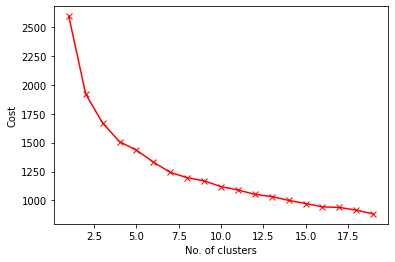

In [ ]:
cost = []
K = range(1,20)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1, random_state = 1)
    kmode.fit_predict(ped_cluster_col)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-', color = 'red')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.show()

In [ ]:
kmode_ped = KModes(n_clusters= 8, init = "random", n_init = 5, verbose=0, random_state = 1)
clusters_ped = kmode.fit_predict(ped_cluster_col)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 113, cost: 1019.0
Run 1, iteration: 2/100, moves: 10, cost: 1019.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 231, cost: 956.0
Run 2, iteration: 2/100, moves: 95, cost: 922.0
Run 2, iteration: 3/100, moves: 24, cost: 922.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 116, cost: 1022.0
Run 3, iteration: 2/100, moves: 33, cost: 1022.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 136, cost: 898.0
Run 4, iteration: 2/100, moves: 37, cost: 884.0
Run 4, iteration: 3/100, moves: 11, cost: 884.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 248, cost: 935.0
Run 5, iteration: 2/100, moves: 55, cost: 935.0
Best run was nu

In [ ]:
ped_cluster_col.insert(0, "Cluster", clusters_ped, True)

In [ ]:
ped_cluster_col[ped_cluster_col['Cluster'] == 0].apply(lambda x: x.mode())

,Cluster,PEDTYPE,PEDACT,PEDCOND,DISABILITY,RDSFCOND,TRAFFCTL,VISIBILITY
0,0,Pedestrian hit at mid-block,Running onto Roadway,Inattentive,<Null>,Wet,No Control,Rain


In [ ]:
ped_cluster_col[ped_cluster_col['Cluster'] == 1].apply(lambda x: x.mode())

,Cluster,PEDTYPE,PEDACT,PEDCOND,DISABILITY,RDSFCOND,TRAFFCTL,VISIBILITY
0,1,Pedestrian hit a PXO/ped. Mid-block signal,"Crossing, Pedestrian Crossover",Normal,<Null>,Dry,Pedestrian Crossover,Clear


In [ ]:
ped_cluster_col[ped_cluster_col['Cluster'] == 2].apply(lambda x: x.mode())

,Cluster,PEDTYPE,PEDACT,PEDCOND,DISABILITY,RDSFCOND,TRAFFCTL,VISIBILITY
0,2,Pedestrian hit at mid-block,"Crossing, no Traffic Control",Inattentive,<Null>,Dry,No Control,Clear


In [ ]:
ped_cluster_col[ped_cluster_col['Cluster'] == 3].apply(lambda x: x.mode())

,Cluster,PEDTYPE,PEDACT,PEDCOND,DISABILITY,RDSFCOND,TRAFFCTL,VISIBILITY
0,3,Vehicle is going straight thru inter.while ped...,Crossing without right of way,Normal,<Null>,Wet,Traffic Signal,Rain


In [ ]:
ped_cluster_col[ped_cluster_col['Cluster'] == 4].apply(lambda x: x.mode())

,Cluster,PEDTYPE,PEDACT,PEDCOND,DISABILITY,RDSFCOND,TRAFFCTL,VISIBILITY
0,4,Pedestrian hit on sidewalk or shoulder,On Sidewalk or Shoulder,Normal,<Null>,Dry,No Control,Clear


In [ ]:
ped_cluster_col[ped_cluster_col['Cluster'] == 5].apply(lambda x: x.mode())

,Cluster,PEDTYPE,PEDACT,PEDCOND,DISABILITY,RDSFCOND,TRAFFCTL,VISIBILITY
0,5,Vehicle turns left while ped crosses with ROW ...,Crossing with right of way,Normal,<Null>,Wet,No Control,Clear


In [ ]:
ped_cluster_col[ped_cluster_col['Cluster'] == 6].apply(lambda x: x.mode())

,Cluster,PEDTYPE,PEDACT,PEDCOND,DISABILITY,RDSFCOND,TRAFFCTL,VISIBILITY
0,6,Pedestrian hit at mid-block,Running onto Roadway,Had Been Drinking,<Null>,Dry,No Control,Clear


In [ ]:
ped_cluster_col[ped_cluster_col['Cluster'] == 7].apply(lambda x: x.mode())

,Cluster,PEDTYPE,PEDACT,PEDCOND,DISABILITY,RDSFCOND,TRAFFCTL,VISIBILITY
0,7,Pedestrian hit on sidewalk or shoulder,On Sidewalk or Shoulder,Normal,<Null>,Dry,Traffic Signal,Clear
